<a href="https://colab.research.google.com/github/Piyush-41/MNIST-handwritten-predication---Deep-Learning-neural-network/blob/main/mnist_handwritten_prdictuon_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST HANDWRITTEN DIGIT CLASSIFICATION USING DEEP LEARNING**

In [10]:
#importing  depenmdemties
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #computer vision
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix




**LOADING THE MNIST FROM KERAS**

---image processing and splitting is already done in the mnist dataset



In [11]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
type(X_train)

numpy.ndarray

In [13]:
#shape od arrays 60k images and 28 pixel by 28 pixel images are greyscale iamges
#0 to 255 means 0 = dark 225 means white
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


traning data = 60,000images
test data = 10,000images
grey scale images = only one color channel

In [14]:
#print the 9 images from x_train
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [15]:
print(X_train[10].shape)

(28, 28)


3


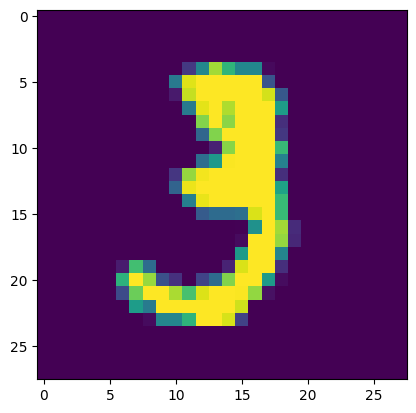

In [16]:
plt.imshow(X_train[10])
print(Y_train[10])

In [17]:
#scaling the values #to normalise so that it can give out as in 0 to 1
#each pixel is divided by 255 of each image
#0/255=0
#67/255=0.26
#255/255=1
X_train=X_train/255
X_test=X_test/255

In [18]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
#Building the neural network
#1.setting up the layers for the nn
#there are 3 layers
#2 have 50-50 neuron
#output has 10 layers for 0 to 9
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(50,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid'),

                         ])





/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
#compiling the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#traning model for NN
model.fit(X_train,Y_train,epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8573 - loss: 0.5021
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9532 - loss: 0.1560
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1114
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9745 - loss: 0.0862
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9792 - loss: 0.0688
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9854 - loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0409
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9880 - loss: 0.0368
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0334


**traning data accuracy is 98-99.12%**

In [23]:
#accuracy of test data
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1370
0.9704999923706055


7


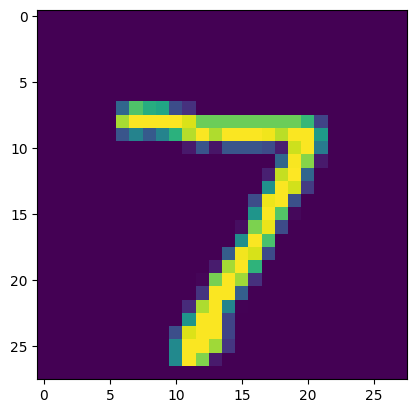

In [24]:
#frist data point in X_test
plt.imshow(X_test[0])
print(Y_test[0])

In [25]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
print(Y_pred.shape)

(10000, 10)


In [27]:
print(Y_pred[0])

[3.4759636e-04 3.1903406e-04 1.4149493e-02 9.7437346e-01 2.5731631e-06
 6.4526289e-04 7.5078485e-12 9.9999905e-01 4.2074635e-03 9.7370690e-01]


In [28]:
#model.predict()gives the probability of each number

In [29]:
#converting the predictaion probabilities to class labels
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [30]:
#converting the predicated values to class lbel for all test data points
#first num is 7 after 2,1,0,4
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [31]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 968    0    1    1    0    0    3    2    2    3]
 [   0 1119    2    3    1    0    2    1    6    1]
 [   7    0  989   18    2    0    2    8    6    0]
 [   1    0    1  996    0    2    1    4    2    3]
 [   1    0    2    1  958    0    6    2    0   12]
 [   2    0    0   29    3  836    9    1    8    4]
 [   3    2    1    1    2    3  943    0    3    0]
 [   1    3    8    6    1    0    0  991    3   15]
 [   4    0    3   22    5    4    2    5  924    5]
 [   3    2    0    8   11    0    1    2    1  981]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

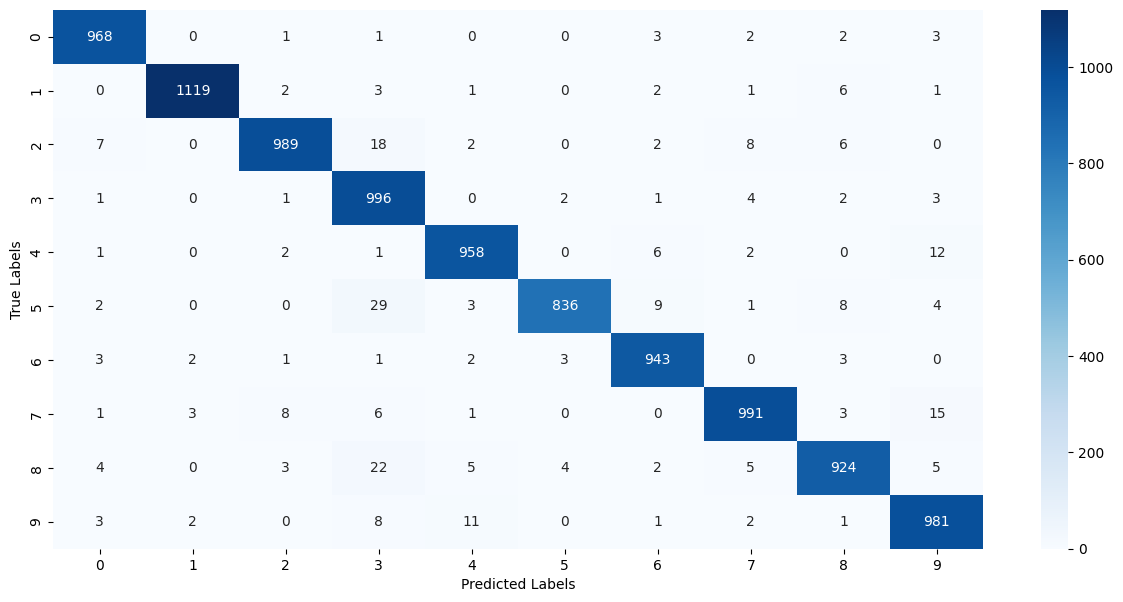

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
#952 images of 0 is correctly predicted to zero

**buliding a predicative system**

In [33]:
input_image_pathnew=("/content/MNIST_digit.png")

In [34]:
input_imagenew=cv2.imread(input_image_pathnew,)

In [35]:
type(input_imagenew)

numpy.ndarray

In [36]:
print(input_imagenew)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


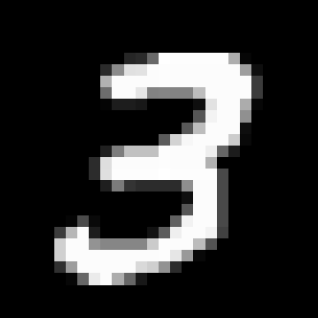

In [37]:
cv2_imshow(input_imagenew)

In [38]:
input_imagenew.shape

(318, 318, 3)

In [39]:
greyscalenew = cv2.cvtColor(input_imagenew,cv2.COLOR_RGB2GRAY)


In [40]:
greyscalenew.shape

(318, 318)

In [41]:
input_image_resizenew=cv2.resize(greyscalenew,(28,28))

In [42]:
input_image_resizenew.shape

(28, 28)

In [43]:
cv2_imshow(input_image_resizenew)

In [46]:
input_image_resizenew=input_image_resizenew/255

In [47]:
input_reshapednew=np.reshape(input_image_resizenew,[1,28,28])

In [48]:
input_predictionnew = model.predict(input_reshapednew)
print(input_predictionnew)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.53149227e-12 6.74170479e-02 1.55510381e-04 1.00000000e+00
  1.50747557e-08 5.12433145e-03 9.34357888e-20 1.04280945e-04
  1.16599061e-01 9.68459666e-01]]


In [49]:
input_pred_labelnew=np.argmax(input_predictionnew)
print(input_pred_labelnew)

3


**predictive system**

enter the path of the image to be predicted/content/MNIST_digit.png


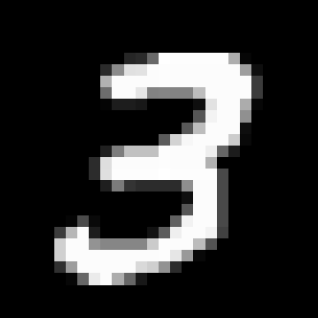

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted label is 3


In [55]:
input_image_pathnew=input("enter the path of the image to be predicted")

input_imagenew=cv2.imread(input_image_pathnew)

cv2_imshow(input_imagenew)

greyscalenew = cv2.cvtColor(input_imagenew,cv2.COLOR_BGR2GRAY)

input_image_resizenew=cv2.resize(greyscalenew,(28,28))

input_image_resizenew=input_image_resizenew/255

input_reshapednew=np.reshape(input_image_resizenew,[1,28,28])

input_predictionnew = model.predict(input_reshapednew)

input_pred_labelnew=np.argmax(input_predictionnew)

print("predicted label is",input_pred_labelnew)